# Implementation of Gradient Descent Algorithm

In this notebook, we implement the basic functions of the Gradient Descent algorithm to be able to perform Deep Learning using just numpy library.

## Reading and Plotting the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Some helper functions for plotting

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([p[0][0] for p in rejected], [p[0][1] for p in rejected], s = 25, color = 'purple', edgecolor = 'c')
    plt.scatter([p[0][0] for p in admitted], [p[0][1] for p in admitted], s = 25, color = 'yellow', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

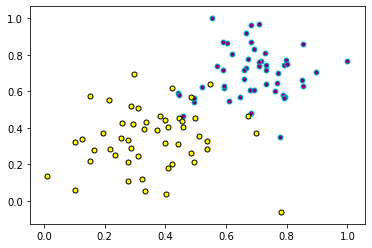

In [8]:
# Read the data
data = pd.read_csv('./data/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

# Plot the data
plot_points(X,y)
plt.show()

## Helper functions implementations
Here we implement the following formulas:
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Prediction formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- Weights updater function

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [9]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Prediction formula
def pred_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, pred):
    return - y*np.log(pred) - (1 - y) * np.log(1-pred)

# Gradient descent step
def update_weights(x, y, weights, bias, lr):
    pred = pred_formula(x, weights, bias)
    d_err = -(y - pred)
    weights -= lr * d_err * x
    bias -= lr * d_err
    return weights, bias

## Train function
This function will iterate the gradient descent algorithm steps through all the data.

In [20]:
np.random.seed(89)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, lr, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    
    # Initialize weights randomly
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs+1):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            pred = pred_formula(x, weights, bias)
            error = error_formula(y, pred)
            weights, bias = update_weights(x, y, weights, bias, lr)
        
        # Print log-loss error
        out = pred_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plot the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plot the data
    plot_points(features, targets)
    plt.show()

    # Plot the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Train and Plot


========== Epoch 0 ==========
Train loss:  0.6350845418895832
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5568121502439317
Accuracy:  0.74

========== Epoch 20 ==========
Train loss:  0.5030278695039031
Accuracy:  0.83

========== Epoch 30 ==========
Train loss:  0.46048524204925273
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.4262102118176131
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.398152615145374
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3748393525141553
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.35520253490407233
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.3384584676512896
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.32402379601410547
Accuracy:  0.94

========== Epoch 100 ==========
Train loss:  0.31145786763263006
Accuracy:  0.94


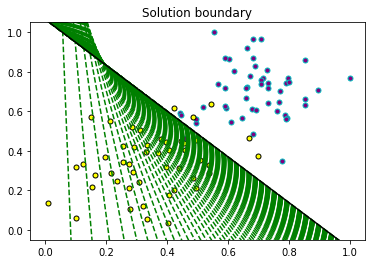

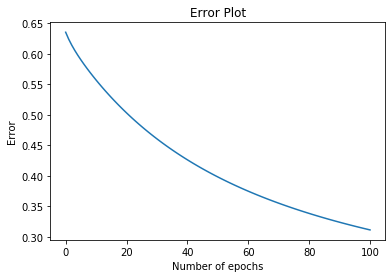

In [21]:
# Train the data
train(X, y, epochs, learnrate, True)